# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

# %matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brett\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brett\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brett\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Read your api key environment variable
# YOUR CODE HERE!
# import newsapi client
from newsapi import NewsApiClient

# set path to api key and get key
load_dotenv(dotenv_path='C:/Users/brett/Desktop/FTBC/.env')
api_key = os.getenv('NEWS_API_KEY')


In [5]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)


In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')
print(f"Total articles: {bitcoin_news['totalResults']}")

Total articles: 4136


In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')
print(f"Total articles: {ethereum_news['totalResults']}")

Total articles: 1323


In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
# loop to get the sentiment score and build a list with sentiments
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu   
        })
        
    except AttributeError:
        pass

# create df from above loop
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec..."
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi..."
2,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether a..."
3,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...
4,0.2732,0.000,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...


In [9]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
# loop to get the sentiment score and build a list with sentiments
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu   
        })
        
    except AttributeError:
        pass

# create df from above loop
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
1,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
2,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...
4,0.3400,0.000,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.399380,0.005850,0.913100,0.081050
std,0.212157,0.018457,0.030714,0.033393
min,-0.128000,0.000000,0.851000,0.000000
25%,0.365900,0.000000,0.910000,0.072000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.914250,0.090000
max,0.599400,0.071000,1.000000,0.149000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,negative,neutral,positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.085259,0.026706,0.922765,0.050529
std,0.331795,0.056512,0.088425,0.058056
min,-0.599400,0.000000,0.732000,0.000000
25%,0.000000,0.000000,0.881000,0.000000
50%,0.000000,0.000000,0.943000,0.045000
75%,0.340000,0.000000,1.000000,0.080000
max,0.757900,0.189000,1.000000,0.181000


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [13]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'chars', 'isnt', 'youve', 'ever', 'utc', 'pm', 'et', 'happenedthe', 'continues',
           'via', 'necessarily', 'within','among', 'yo', 'let', 'whats', 'going',
           'took', 'seen', 'since', 'well', 'would', 'actually', 'still', 'hadnt',
           'though', 'try', 'guy', 'zip', 'f', 'w', 'hi', 'g', 'sed', 'leo',
           'like', 'fucking', 'every', 'daywelcome', 'e', 'could', 'th', 'get',
           'puts', 'youre', 'j'}

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    
    return tokens


In [15]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_tokens = []

for text in bitcoin_df['text']:
    t = tokenizer(text)
    bitcoin_tokens.append(t)

bitcoin_df['tokens'] = pd.Series(bitcoin_tokens).values
pd.set_option('max_colwidth', 100)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin security services, is launching a managed service all...","[casa, coloradobased, provider, bitcoin, security, services, launching, managed, service, allowi..."
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett r...","[april, secret, service, seized, bitcoins, clark, nyt, reports, weeks, later, bennett, received,..."
2,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether all that GPU-crunching would actually work. After m...","[question, remained, whether, gpucrunching, work, months, hammering, problem, stay, finally, rea..."
3,0.5106,0.000,0.878,0.122,"A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malw...","[ransomware, variant, called, netwalker, surprisingly, even, economy, malware, takes, computers,..."
4,0.2732,0.000,0.937,0.063,"“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased...","[covid, pandemic, resulted, mass, shift, working, home, resulting, increased, use, corporate, vp..."


In [16]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_tokens = []

for text in ethereum_df['text']:
    t = tokenizer(text)
    ethereum_tokens.append(t)

ethereum_df['tokens'] = pd.Series(ethereum_tokens).values
pd.set_option('max_colwidth', 100)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,"TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% ...","[tldr, mega, blockchain, mastery, bundle, sale, august, saving, list, pricecash, king, anymore, ..."
1,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up colla...,"[london, reuters, sounds, surefire, bet, lend, money, borrower, collateral, exceeds, size, loan,..."
2,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &am...,"[new, york, reuters, brooklynbased, technology, startup, consensys, acquired, jpmorgan, chase, a..."
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypt...,"[outspoken, bitcoin, whale, rarely, shows, affection, anything, btc, says, two, crypto, assets, ..."
4,0.3400,0.000,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogratz told Bloomberg the price of gold could certain...,"[reutersrick, wilkingullimichael, novogratz, told, bloomberg, price, gold, certainly, lilithe, g..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams
import itertools

In [18]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
all_btc_tokens = list(itertools.chain(*bitcoin_tokens))

btc_bigram = Counter(ngrams(all_btc_tokens, n=2))
btc_bigram

Counter({('casa', 'coloradobased'): 1,
         ('coloradobased', 'provider'): 1,
         ('provider', 'bitcoin'): 1,
         ('bitcoin', 'security'): 1,
         ('security', 'services'): 1,
         ('services', 'launching'): 1,
         ('launching', 'managed'): 1,
         ('managed', 'service'): 1,
         ('service', 'allowing'): 1,
         ('allowing', 'customers'): 1,
         ('customers', 'buy'): 1,
         ('buy', 'hold'): 1,
         ('hold', 'bitcoin'): 1,
         ('bitcoin', 'rather'): 1,
         ('rather', 'using'): 1,
         ('using', 'external'): 1,
         ('external', 'custodian'): 1,
         ('custodian', 'coinbas'): 1,
         ('coinbas', 'april'): 1,
         ('april', 'secret'): 1,
         ('secret', 'service'): 2,
         ('service', 'seized'): 1,
         ('seized', 'bitcoins'): 1,
         ('bitcoins', 'clark'): 1,
         ('clark', 'nyt'): 1,
         ('nyt', 'reports'): 1,
         ('reports', 'weeks'): 1,
         ('weeks', 'later'): 1,
     

In [19]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
all_eth_tokens = list(itertools.chain(*ethereum_tokens))

eth_bigram = Counter(ngrams(all_eth_tokens, n=2))
eth_bigram

Counter({('tldr', 'mega'): 1,
         ('mega', 'blockchain'): 1,
         ('blockchain', 'mastery'): 1,
         ('mastery', 'bundle'): 1,
         ('bundle', 'sale'): 1,
         ('sale', 'august'): 1,
         ('august', 'saving'): 1,
         ('saving', 'list'): 1,
         ('list', 'pricecash'): 1,
         ('pricecash', 'king'): 1,
         ('king', 'anymore'): 1,
         ('anymore', 'probably'): 1,
         ('probably', 'heard'): 1,
         ('heard', 'cryptocurrency'): 1,
         ('cryptocurrency', 'bloc'): 1,
         ('bloc', 'london'): 1,
         ('london', 'reuters'): 1,
         ('reuters', 'sounds'): 1,
         ('sounds', 'surefire'): 1,
         ('surefire', 'bet'): 1,
         ('bet', 'lend'): 1,
         ('lend', 'money'): 1,
         ('money', 'borrower'): 1,
         ('borrower', 'collateral'): 1,
         ('collateral', 'exceeds'): 1,
         ('exceeds', 'size'): 1,
         ('size', 'loan'): 1,
         ('loan', 'earn'): 1,
         ('earn', 'interest'): 1,
  

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(all_btc_tokens)

[('bitcoin', 40),
 ('satoshi', 24),
 ('nakaboto', 24),
 ('robot', 12),
 ('colleague', 12),
 ('writes', 12),
 ('another', 12),
 ('edition', 12),
 ('today', 12),
 ('tell', 12)]

In [22]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(all_eth_tokens)

[('ethereum', 9),
 ('bitcoin', 6),
 ('price', 5),
 ('cryptocurrency', 4),
 ('one', 4),
 ('blockchain', 3),
 ('new', 3),
 ('eth', 3),
 ('august', 2),
 ('heard', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

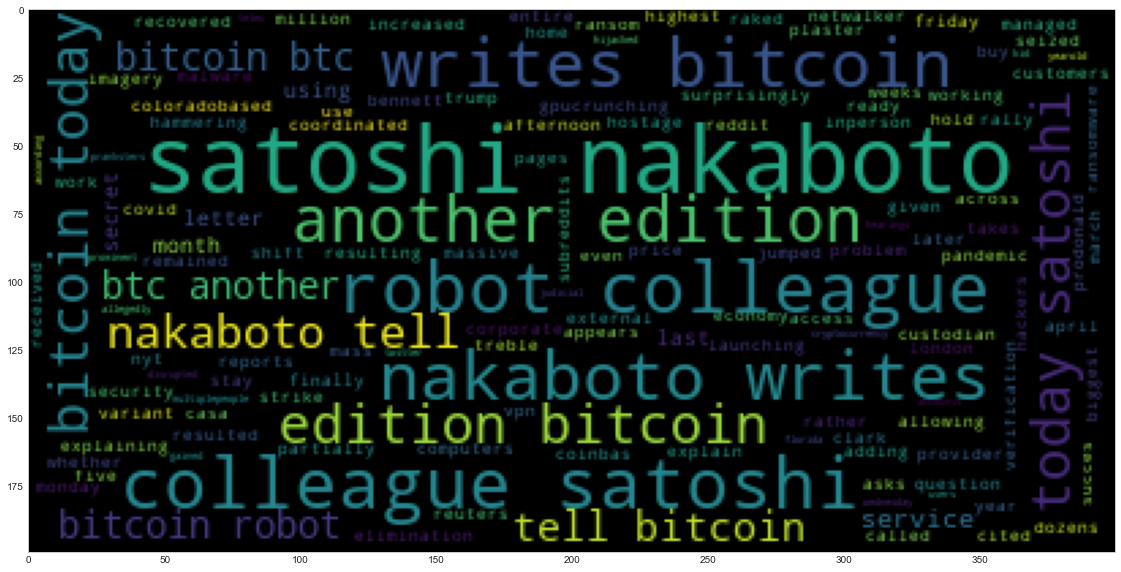

In [30]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_string = ' '.join(all_btc_tokens)
btc_wc = WordCloud().generate(btc_string)
plt.imshow(btc_wc)
plt.grid(None)

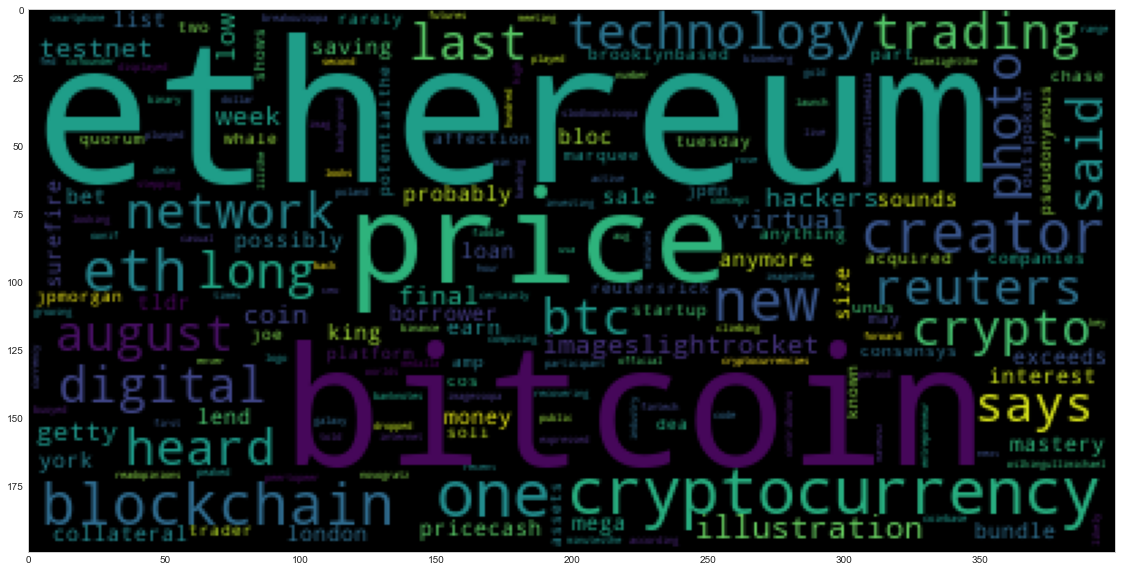

In [31]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_string = ' '.join(all_eth_tokens)
eth_wc = WordCloud().generate(eth_string)
plt.imshow(eth_wc)
plt.grid(None)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [39]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_all_text = ' '.join(bitcoin_df['text'])

In [45]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner_text = nlp(btc_all_text)
# Add a title to the document
# YOUR CODE HERE!
btc_ner_text.user_data["title"] = "Bitcoin Text NER Rendering"

In [46]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner_text, style='ent')

In [56]:
# List all Entities
# YOUR CODE HERE!
for ent in btc_ner_text.ents:
    print(ent.text, ent.label_)

Casa ORG
Colorado GPE
Coinbas ORG
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
VPN PRODUCT
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Wednesday DATE
17-year-old DATE
Florida GPE
Twitter ORG
last month DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto 

---

## Ethereum NER

In [57]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
eth_all_text = ' '.join(ethereum_df['text'])

In [58]:
# Run the NER processor on all of the text
eth_ner_text = nlp(eth_all_text)
# Add a title to the document
# YOUR CODE HERE!
eth_ner_text.user_data["title"] = "Ethereum Text NER Rendering"

In [60]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner_text, style='ent')

In [61]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_ner_text.ents:
    print(ent.text, ent.label_)

29.81 MONEY
August 17 DATE
97% PERCENT
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
August DATE
4 DATE
2020 DATE
5 CARDINAL
one CARDINAL
first ORDINAL
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Medalla PERSON
the Ethereum Foundation ORG
ul><li PERSON
Medalla GPE
Aug. 2 DATE
418 MONEY
5 minutes TIME
25% PERCENT
Binance Futures ORG
ETH ORG
as low as $302 MONEY
385 MONEY
10 minutes TIME
one hundred dollar MONEY
Fintech ORG
Last week DATE
YouTube PRODUCT
Bitcoin GPE
Bitcoin GPE
one-week DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,595 MONEY
20:0 CARDINAL
Creator Coin